In [1]:
import seaborn as sns
import matplotlib as plt

In [2]:
cwidth = 4
cheight = cwidth / 1.618 #Divine proportion!

label_size = 0
tick_size = 0
text_size = 0

def set_text_size(c):
    label_size = 10 * c / 2.2#2.73 #Multiply by 4/2.73 since figures are going to have 2.73 inches in final pdf 
    #label_size = 12 * c / 2.73 #Multiply by 4/2.73 since figures are going to have 2.73 inches in final pdf 
    tick_size = 8 * c / 2.2#2.73
    text_size = 12 * c / 2.2#2.73
    tick_size = 12 * c / 2.2#2.73
    
    params = {"axes.labelsize": label_size, "font.family":"sans-serif", "font.serif":"Helvetica",
         "xtick.labelsize": tick_size, "ytick.labelsize":tick_size}
    sns.set_context("paper", rc=params)
    return label_size, tick_size, text_size

label_size, tick_size, text_size = set_text_size(cwidth)

#path = "../articulo/v3/graphs/"
#datapath = "larr_data/larremore_data/"

plt.rc('text', usetex=True)
#plt.rc('xtick', labelsize=8)
#plt.rc('ytick', labelsize=8)
#plt.rc('axes', labelsize=8)

print(sns.axes_style())
print(sns.plotting_context())

def set_ticks(axis, x, ticks, fmt=1):
    if (x=="x"):
        axis.set_xticks(ticks)
        axis.set_xticklabels(["{0:.{1}f}".format(t, fmt) for t in ticks])
    else:
        axis.set_yticks(ticks)
        axis.set_yticklabels(["{0:.{1}f}".format(t, fmt) for t in ticks])

{'axes.facecolor': 'white', 'axes.edgecolor': 'black', 'axes.grid': False, 'axes.axisbelow': 'line', 'axes.labelcolor': 'black', 'figure.facecolor': (1, 1, 1, 0), 'grid.color': '#b0b0b0', 'grid.linestyle': '-', 'text.color': 'black', 'xtick.color': 'black', 'ytick.color': 'black', 'xtick.direction': 'out', 'ytick.direction': 'out', 'lines.solid_capstyle': <CapStyle.projecting: 'projecting'>, 'patch.edgecolor': 'black', 'patch.force_edgecolor': False, 'image.cmap': 'viridis', 'font.family': ['sans-serif'], 'font.sans-serif': ['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif'], 'xtick.bottom': True, 'xtick.top': False, 'ytick.left': True, 'ytick.right': False, 'axes.spines.left': True, 'axes.spines.bottom': True, 'axes.spines.right': True, 'axes.spines.top': True}
{'font.size': 9.600000000000001, 'axes.labelsize': 18.18181818181818, 'axes.titlesize': 9.600000000000001, 'xtic

/tmp/ipykernel_62679/2486186515.py:4: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
/tmp/ipykernel_62679/2486186515.py:10: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


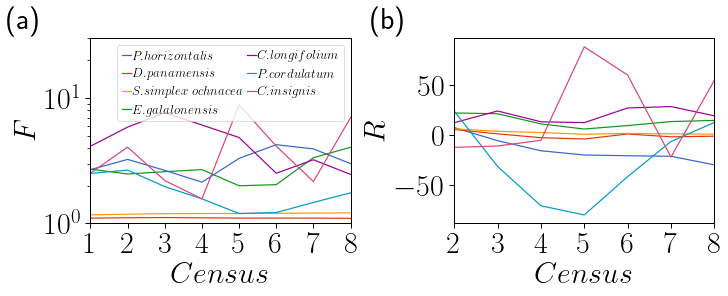

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans# generate some random cluster data
from scipy.ndimage.filters import gaussian_filter1d
from sklearn.cluster import DBSCAN
import scipy.spatial
#import libpysal as ps
import scprep
import seaborn as sns
from mpl_toolkits.axisartist.axislines import SubplotZero
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from numpy import random
from scipy.spatial import cKDTree
import pandas as pd
import seaborn as sns
import copy
import plotly.express as px


ax_dict = plt.figure(constrained_layout=True,figsize=(10,4)).subplot_mosaic(
    """
    AB
    """
)

#pal1 = sns.color_palette("Spectral", 7)
pal1 = px.colors.qualitative.G10
pal=copy.deepcopy(pal1)

#Read DATA
SPsycho=np.load('SPsycho.npy')
Sdes2pa=np.load('Sdes2pa.npy')
Sswars2=np.load('Sswars2.npy')
Seugega=np.load('Seugega.npy')
Scalolo=np.load('Scalolo.npy')
Spipeco=np.load('Spipeco.npy')
Scecrin=np.load('Scecrin.npy')

ax_dict['A'].plot(SPsycho[1],SPsycho[0],label='$P. horizontalis$',color=pal.pop(0))
ax_dict['A'].plot(Sdes2pa[1],Sdes2pa[0],label='$D. panamensis$',color=pal.pop(0))
ax_dict['A'].plot(Sswars2[1],Sswars2[0],label='$S. simplex~ochnacea$',color=pal.pop(0))
ax_dict['A'].plot(Seugega[1],Seugega[0],label='$E. galalonensis$',color=pal.pop(0))
ax_dict['A'].plot(Scalolo[1],Scalolo[0],label='$C. longifolium$',color=pal.pop(0))
ax_dict['A'].plot(Spipeco[1],Spipeco[0],label='$P. cordulatum$',color=pal.pop(0))
ax_dict['A'].plot(Scecrin[1],Scecrin[0],label='$C. insignis$',color=pal.pop(0))

#ax_dict['A'].set_yscale("log")
ax_dict['A'].legend(ncol=2,columnspacing=0.2,handlelength=0.7,
                    handletextpad=0.1,fontsize=13)
ax_dict['A'].set_xlim(1,8)
ax_dict['A'].set_xticks([1,2,3,4,5,6,7,8])
ax_dict['A'].set_yscale('log')
ax_dict['A'].set_ylim(1e0,30)

ax_dict['A'].set_ylabel(r'$F$',fontsize=30)
ax_dict['A'].set_xlabel(r'$Census$',fontsize=30)




#ax_dict['A'].set_yscale("log")

#pal1 = sns.color_palette("hls", 10)
pal1 = px.colors.qualitative.G10
pal=pal1
#pal = px.colors.qualitative.Plotly
#print(pal)

BCI = pd.read_csv("Temp_Ev.csv",delimiter=',',header=None) 

#Names = pd.read_csv("Names_BCI.csv",delimiter=',',header=None) 


BCI=BCI.sort_values(by=1,ascending=False)

DerBCI=BCI
DerBCI[1]=(BCI[2]/BCI[1]-1)
DerBCI[2]=(BCI[3]/BCI[2]-1)
DerBCI[3]=(BCI[4]/BCI[3]-1)
DerBCI[4]=(BCI[5]/BCI[4]-1)
DerBCI[5]=(BCI[6]/BCI[5]-1)
DerBCI[6]=(BCI[7]/BCI[6]-1)
DerBCI[7]=(BCI[8]/BCI[7]-1)

species=['psycho','des2pa','swars2','eugega','calolo','pipeco','cecrin']


for spec in species:
    s1=np.where(DerBCI.iloc[:]==spec)[0][0]
    row = DerBCI.iloc[s1]
    xax=[2,3,4,5,6,7,8]
    ax_dict['B'].plot(xax,100*row.values[1:8],color=pal.pop(0))

ax_dict['B'].set_xlim(2,8)
ax_dict['B'].set_xticks([2,3,4,5,6,7,8])

ax_dict['B'].set_ylabel(r'$R$',fontsize=30)
ax_dict['B'].set_xlabel(r'$Census$',fontsize=30)


ax_dict['A'].text(-0.32, 1.05, '(a)', transform=ax_dict['A'].transAxes, 
            size=30, weight='bold')
ax_dict['B'].text(-0.32, 1.05, '(b)', transform=ax_dict['B'].transAxes, 
            size=30, weight='bold')

ax_dict['A'].tick_params(labelsize=30)
ax_dict['B'].tick_params(labelsize=30)


plt.savefig('Predictors.svg')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans# generate some random cluster data
from scipy.ndimage.filters import gaussian_filter1d
from sklearn.cluster import DBSCAN
import scipy.spatial
import libpysal as ps
import scprep
import seaborn as sns
from mpl_toolkits.axisartist.axislines import SubplotZero
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from numpy import random

from scipy.spatial import cKDTree




os.chdir('/home/pablo/Nextcloud/Postdoc_Lucca/Resultados/Breaking_Point_Processes/Poisson/')

ax_dict = plt.figure(constrained_layout=True,figsize=(4.5,3)).subplot_mosaic(
    """
    A
    """
)


c1,c2,c3 = "#20B3AE", "#9728BE", "#70B80D"
c1,c2,c3 = "#3a4aa6ff", "#eb1c23ff", "#211e1eff"
c4='#f8990cff'
c5='#237f38ff'

data3= pd.read_csv('Data_N_1000000_Poisson', delimiter = ',',header=None)

print('read')
pal=sns.color_palette("Blues",5)
pal = sns.color_palette('magma', n_colors=4, desat=1.0)

#c0=pal.pop(0)
c1=pal.pop(0)
c2=pal.pop(0)
c3=pal.pop(0)
c4=pal.pop(0)


points = np.array([data3[3], data3[0]]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(-0.2, 1)
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(data3[0])
lc.set_linewidth(2)
line = ax_dict['A'].add_collection(lc)


ax_dict['A'].plot(data3[3], data3[0], linestyle='-',linewidth=2.5,zorder=0, marker="None",color=c4,label='$N=10^6$')

ax_dict['A'].set_ylabel('Giant cluster')
ax_dict['A'].set_xlabel('Interaction radius')
ax_dict['A'].set_ylim(-0.02,1.02)

ax_dict['A'].set_yticks([])
ax_dict['A'].set_xticks([])
ax_dict['A'].spines.right.set_visible(False)
ax_dict['A'].spines.top.set_visible(False)
ax_dict['A'].set_xlim(0.5,4.5)
ax_dict['A'].set_title('Continuum percolation phase transition',size=12)


#First inset column
ax1 = inset_axes(ax_dict['A'], 
                    width="30%", # width = 30% of parent_bbox
                    height="30%", # height : 1 inch
                    loc='upper left')

ip = InsetPosition(ax_dict['A'], [0.05,0.08,0.35,0.4])
ax1.set_axes_locator(ip)

width, height = 10,10
N=50
smax=0
var=0
PPD=0

X, y = make_blobs(random_state=170, n_samples=N, centers = 5)
X[:, 0]=np.random.uniform(0,width,N)
X[:, 1]=np.random.uniform(0,height,N)

x1=X[:, 0]
y1=X[:, 1]

#First separation
ax1.scatter(x1,y1,marker='.',color='black')

pp = PointPattern(X)
print('IPP-D:',pp.mean_nnd)

eps1=1.0*pp.mean_nnd

dbscan = DBSCAN(eps=eps1, min_samples = 1,n_jobs=-1)
clusters = dbscan.fit_predict(X)# plot the cluster assignments
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

cmap1 = mpl.colors.ListedColormap(sns.color_palette("tab20"),N=len(np.unique(clusters)))
#cmap1=scprep.plot.colors.tab30()

for i in range(N):
    draw_circle = plt.Circle((x1[i], y1[i]), eps1, color=cmap1(clusters[i]),fill=False)
    ax1.add_artist(draw_circle)

ax1.set_aspect(1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Isolated clusters',fontsize=10)


#Second inset column
ax2 = inset_axes(ax_dict['A'], 
                    width="30%", # width = 30% of parent_bbox
                    height="30%", # height : 1 inch
                    loc='upper left')

ip = InsetPosition(ax_dict['A'], [0.5,0.08,0.35,0.4])
ax2.set_axes_locator(ip)

width, height = 10,10
N=50
smax=0
var=0
PPD=0

X, y = make_blobs(random_state=170, n_samples=N, centers = 5)
X[:, 0]=np.random.uniform(0,width,N)
X[:, 1]=np.random.uniform(0,height,N)

x1=X[:, 0]
y1=X[:, 1]

#First separation
ax2.scatter(x1,y1,marker='.',color='black')

pp = PointPattern(X)
print('IPP-D:',pp.mean_nnd)

eps1=2.5*pp.mean_nnd

dbscan = DBSCAN(eps=eps1, min_samples = 1,n_jobs=-1)
clusters = dbscan.fit_predict(X)# plot the cluster assignments
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

cmap1 = mpl.colors.ListedColormap(sns.color_palette("tab20"),N=len(np.unique(clusters)))
#cmap1=scprep.plot.colors.tab30()

for i in range(N):
    draw_circle = plt.Circle((x1[i], y1[i]), eps1, color=cmap1(clusters[i]),fill=False)
    ax2.add_artist(draw_circle)

ax2.set_aspect(1)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Percolated cluster',fontsize=10)

#Critical inset
ax3 = inset_axes(ax_dict['A'], 
                    width="30%", # width = 30% of parent_bbox
                    height="30%", # height : 1 inch
                    loc='upper left')

ip = InsetPosition(ax_dict['A'], [0.55,0.61,0.28,0.32])
ax3.set_axes_locator(ip)

#Draw circles
N=10000
x1=np.zeros(N)
y1=np.zeros(N)
cont=0
while (cont<N):
    ch=0
    x=np.random.exponential(1.0)
    y=random.uniform(0,1.0)
    x1[cont]=x
    y1[cont]=y
    cont=cont+1

X=[x1,y1]
X=np.transpose(np.array(X))
ep_x=1.310
tree = cKDTree(X)
nearest_dist, nearest_ind = tree.query(X, k=2,workers=-1)  # k=2 nearest neighbors where k1 = identity
IPD=np.mean(nearest_dist[:, 1])

eps1=ep_x*IPD;
dbscan = DBSCAN(eps=eps1, min_samples = 1,n_jobs=-1)
clusters = dbscan.fit_predict(X)# plot the cluster assignments
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
b = np.linspace(1,n_clusters,n_clusters)
hist = np.histogram(clusters, bins=b,density=False)
hist1, hist2 = zip(*sorted(zip(hist[0], hist[1]),reverse=True))
clusters2=np.copy(clusters)
#print(hist2)
for i in range(len(hist2)):
    index=hist2[i]
    index2=np.where(clusters==index)
    for j in range(len(index2)):
        j1=index2[j]
        clusters2[j1]=randint(1, len(hist2))#i

cmap1=scprep.plot.colors.tab30()

ax3.scatter(X[:, 0],X[:, 1],s=0.005,c=clusters2, cmap=cmap1,rasterized=True)  

ax3.set_xlim(0,2)
ax3.set_ylim(0,1)
ax3.set_xticks([])
ax3.set_yticks([])


#Critical 4
ax4 = inset_axes(ax_dict['A'], 
                    width="30%", # width = 30% of parent_bbox
                    height="30%", # height : 1 inch
                    loc='upper left')

ip = InsetPosition(ax_dict['A'], [-0.02,0.61,0.33,0.33])
ax4.set_axes_locator(ip)

N=int(1e4)
width, height = 1000.0, 1000.0
X=random.uniform(0,width, size=(N,int(2)))
ep_x=2.385
tree = cKDTree(X)
nearest_dist, nearest_ind = tree.query(X, k=2,workers=-1)  # k=2 nearest neighbors where k1 = identity
IPD=np.mean(nearest_dist[:, 1])

eps1=ep_x*IPD;
dbscan = DBSCAN(eps=eps1, min_samples = 1,n_jobs=-1)
clusters = dbscan.fit_predict(X)# plot the cluster assignments
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
b = np.linspace(1,n_clusters,n_clusters)
hist = np.histogram(clusters, bins=b,density=False)
hist1, hist2 = zip(*sorted(zip(hist[0], hist[1]),reverse=True))
clusters2=np.copy(clusters)
#print(hist2)
for i in range(len(hist2)):
    index=hist2[i]
    index2=np.where(clusters==index)
    for j in range(len(index2)):
        j1=index2[j]
        clusters2[j1]=randint(1, len(hist2))#i

cmap1=scprep.plot.colors.tab30()

ax4.scatter(X[:, 0],X[:, 1],s=0.005,c=clusters2, cmap=cmap1,rasterized=True)  

ax4.set_aspect(1)
ax4.set_xlim(0,1e3)
ax4.set_ylim(0,1e3)
ax4.set_xticks([])
ax4.set_yticks([])

ax_dict['A'].axvline(x = 2.4, color = 'black', ls='--',zorder=-3)
ax_dict['A'].text(0.27, 0.87, 'Critical point', transform=ax_dict['A'].transAxes, 
            size=10, weight='bold')

os.chdir('/home/pablo/Nextcloud/Postdoc_CREF/Resultados/BCIData_CorrIntegral')

plt.savefig('Sketch.svg',dpi=600)
plt.show()

/tmp/ipykernel_60413/744811158.py:10: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d
/tmp/ipykernel_60413/744811158.py:148: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(w_pad=1)
/tmp/ipykernel_60413/744811158.py:148: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout(w_pad=1)


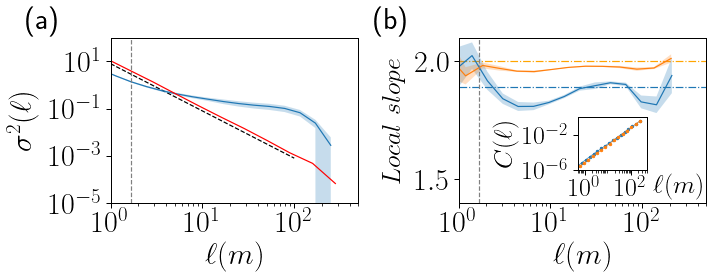

In [41]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans# generate some random cluster data
from scipy.ndimage.filters import gaussian_filter1d
from sklearn.cluster import DBSCAN
import scipy.spatial
#import libpysal as ps
import scprep
import seaborn as sns
from mpl_toolkits.axisartist.axislines import SubplotZero
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from numpy import random
from scipy.spatial import cKDTree

ax_dict = plt.figure(constrained_layout=True,figsize=(10,4)).subplot_mosaic(
    """
    AB
    """
)


#Read DATA
sigma1=np.load('MassVar.npy')
rad1=np.load('MassRad.npy')
sigmaP=np.load('sigmaP.npy')
rsP=np.load('rsP.npy')

CdsH=np.load('CdsHyb.npy')
RH=np.load('RadiusCds.npy')
CdsT=np.load('CdsTot.npy')
RHT=np.load('RadiusCdsTot.npy')


my = np.mean((sigma1), axis=0)
sy = 2*np.std((sigma1), axis=0)
rs = np.mean((rad1), axis=0)

ax_dict['A'].plot(rs,my)
ax_dict['A'].fill_between(rs, my-sy, my+sy,alpha=0.25)

x = np.linspace(1,1e2,200)
y = 8*np.power(x, -2)
ax_dict['A'].plot(x,y,color='black',label=r'$\alpha=-1$',ls='--',zorder=-1)
ax_dict['A'].axvline(x=1.6523035528109429,ls='--',color='gray')

sigmaP[sigmaP == 0] = 'nan'
ax_dict['A'].plot(rsP,sigmaP,color='r')


ax_dict['A'].set_xscale("log")
ax_dict['A'].set_yscale("log")
ax_dict['A'].set_xlim(1e0,5e2)
ax_dict['A'].set_ylim(1e-5,1e2)
ax_dict['A'].set_yticks([1e-5,1e-3,1e-1,1e1])
ax_dict['A'].set_xticks([1e0,1e1,1e2])

ax_dict['A'].set_ylabel(r'$\sigma^2(\ell)$',fontsize=30,labelpad=10)
ax_dict['A'].set_xlabel(r'$\ell(m)$',fontsize=30)

#Correlation dimension
dx = np.diff(np.log10(RH))
dy = np.diff(np.log10(CdsH))
slopes = dy/dx
rsm = np.mean((RH), axis=0)
RH1=(rsm[1:]+rsm[:-1])/2

my = np.mean((slopes), axis=0)
sy = np.std((slopes), axis=0)

ax_dict['B'].plot(RH1,my)
ax_dict['B'].fill_between(RH1, my-sy, my+sy,alpha=0.25)

#Correlation dimension
dx = np.diff(np.log10(RHT))
dy = np.diff(np.log10(CdsT))
slopes = dy/dx
rsm = np.mean((RHT), axis=0)
RH1=(rsm[1:]+rsm[:-1])/2

my = np.mean((slopes), axis=0)
sy = np.std((slopes), axis=0)

ax_dict['B'].plot(RH1,my)
ax_dict['B'].fill_between(RH1, my-sy, my+sy,alpha=0.25)


ax_dict['B'].axvline(x=1.6523035528109429,ls='--',color='gray')
ax_dict['B'].axhline(y=1.89, color='C0', linestyle='-.',zorder=-2)
ax_dict['B'].axhline(y=2.0, color='orange', linestyle='-.',zorder=-2)
ax_dict['B'].set_xscale('log')
ax_dict['B'].set_ylim(1.4,2.2)
ax_dict['B'].set_ylim(1.4,2.1)

ax_dict['B'].set_xlim(1e0,5e2)

ax_dict['B'].set_ylabel(r'$Local~slope$',fontsize=26,labelpad=10)
ax_dict['B'].set_xlabel(r'$\ell(m)$',fontsize=30)

#Inset B
#Critical inset
ax3 = inset_axes(ax_dict['B'], 
                    width="30%", # width = 30% of parent_bbox
                    height="30%", # height : 1 inch
                    loc='upper left')

ip = InsetPosition(ax_dict['B'], [0.48,0.2,0.28,0.32])
ax3.set_axes_locator(ip)

my = np.mean((CdsH), axis=0)
sy = np.std((CdsH), axis=0)
rs = np.mean((RH), axis=0)

ax3.plot(rs,my,marker='.',lw=0.5)
ax3.fill_between(rs, my-sy, my+sy,alpha=0.25)

my = np.mean((CdsT), axis=0)
sy = np.std((CdsT), axis=0)
rs = np.mean((RHT), axis=0)
ax3.plot(rs,my,marker='.',lw=0.5)
ax3.fill_between(rs, my-sy, my+sy,alpha=0.25)

ax3.set_xscale("log")
ax3.set_yscale("log")
ax3.set_xlim(5e-1,5e2)
ax3.set_ylim(1e-6,1e0)
ax3.set_xticks([1e0,1e2])


ax3.set_ylabel(r'$C(\ell)$',fontsize=26)
ax3.set_xlabel(r'$\ell(m)$',labelpad=-27,x=1.45,fontsize=26)
ax3.tick_params(labelsize=26)

ax_dict['A'].text(-0.34, 1.05, '(a)', transform=ax_dict['A'].transAxes, 
            fontsize=30, weight='bold')
ax_dict['B'].text(-0.34, 1.05, '(b)', transform=ax_dict['B'].transAxes, 
            fontsize=30, weight='bold')

ax_dict['A'].tick_params(labelsize=30)
ax_dict['B'].tick_params(labelsize=30)

plt.tight_layout(w_pad=1)
plt.savefig('Slopes_New.svg')
plt.show()

/tmp/ipykernel_61920/4004357622.py:10: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


IndexError: pop from empty list

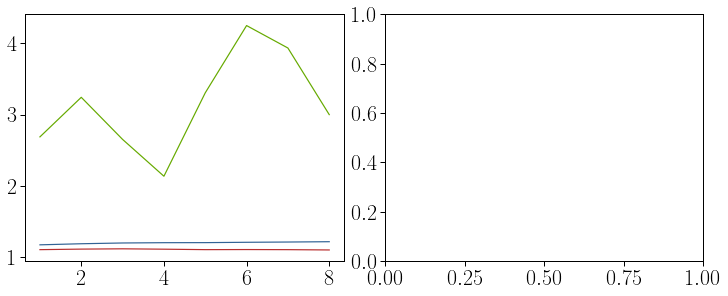

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans# generate some random cluster data
from scipy.ndimage.filters import gaussian_filter1d
from sklearn.cluster import DBSCAN
import scipy.spatial
#import libpysal as ps
import scprep
import seaborn as sns
from mpl_toolkits.axisartist.axislines import SubplotZero
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from numpy import random
from scipy.spatial import cKDTree
import pandas as pd
import seaborn as sns
import copy
import plotly.express as px


ax_dict = plt.figure(constrained_layout=True,figsize=(10,4)).subplot_mosaic(
    """
    AB
    """
)

#pal1 = sns.color_palette("Spectral", 7)
pal1 = px.colors.qualitative.G10
pal=copy.deepcopy(pal1)

#Read DATA
SPsycho=np.load('SPsycho.npy')
Sdes2pa=np.load('Sdes2pa.npy')
Sswars2=np.load('Sswars2.npy')
Seugega=np.load('Seugega.npy')
Scalolo=np.load('Scalolo.npy')
Spipeco=np.load('Spipeco.npy')
Scecrin=np.load('Scecrin.npy')

ax_dict['A'].plot(SPsycho[1],SPsycho[0],label='$P. horizontalis$',color=pal.pop(0))
ax_dict['A'].plot(Sdes2pa[1],Sdes2pa[0],label='$D. panamensis$',color=pal.pop(0))
ax_dict['A'].plot(Sswars2[1],Sswars2[0],label='$S. simplex~ochnacea$',color=pal.pop(0))
ax_dict['A'].plot(Seugega[1],Seugega[0],label='$E. galalonensis$',color=pal.pop(0))
ax_dict['A'].plot(Scalolo[1],Scalolo[0],label='$C. longifolium$',color=pal.pop(0))
ax_dict['A'].plot(Spipeco[1],Spipeco[0],label='$P. cordulatum$',color=pal.pop(0))
ax_dict['A'].plot(Scecrin[1],Scecrin[0],label='$C. insignis$',color=pal.pop(0))

#ax_dict['A'].set_yscale("log")
ax_dict['A'].legend(bbox_to_anchor=(0.01, 0.5),ncol=2,columnspacing=0.2,handlelength=0.7,
                    handletextpad=0.25,fontsize=14)
ax_dict['A'].set_xlim(1,8)
ax_dict['A'].set_xticks([1,2,3,4,5,6,7,8])
ax_dict['A'].set_yscale('log')
ax_dict['A'].set_ylim(1e0,30)

ax_dict['A'].set_ylabel(r'$F$',fontsize=30)
ax_dict['A'].set_xlabel(r'$Census$',fontsize=30)




#ax_dict['A'].set_yscale("log")

#pal1 = sns.color_palette("hls", 10)
pal1 = px.colors.qualitative.G10
pal=pal1
#pal = px.colors.qualitative.Plotly
#print(pal)

BCI = pd.read_csv("Temp_Ev.csv",delimiter=',',header=None) 

#Names = pd.read_csv("Names_BCI.csv",delimiter=',',header=None) 


BCI=BCI.sort_values(by=1,ascending=False)

DerBCI=BCI
DerBCI[1]=(BCI[2]/BCI[1]-1)
DerBCI[2]=(BCI[3]/BCI[2]-1)
DerBCI[3]=(BCI[4]/BCI[3]-1)
DerBCI[4]=(BCI[5]/BCI[4]-1)
DerBCI[5]=(BCI[6]/BCI[5]-1)
DerBCI[6]=(BCI[7]/BCI[6]-1)
DerBCI[7]=(BCI[8]/BCI[7]-1)

species=['psycho','des2pa','swars2','eugega','calolo','pipeco','cecrin']


for spec in species:
    s1=np.where(DerBCI.iloc[:]==spec)[0][0]
    row = DerBCI.iloc[s1]
    xax=[2,3,4,5,6,7,8]
    ax_dict['B'].plot(xax,100*row.values[1:8],color=pal.pop(0))

ax_dict['B'].set_xlim(2,8)
ax_dict['B'].set_xticks([2,3,4,5,6,7,8])

ax_dict['B'].set_ylabel(r'$R$',fontsize=30)
ax_dict['B'].set_xlabel(r'$Census$',fontsize=30)


ax_dict['A'].text(-0.32, 1.05, '(a)', transform=ax_dict['A'].transAxes, 
            size=30, weight='bold')
ax_dict['B'].text(-0.32, 1.05, '(b)', transform=ax_dict['B'].transAxes, 
            size=30, weight='bold')

ax_dict['A'].tick_params(labelsize=30)
ax_dict['B'].tick_params(labelsize=30)


plt.savefig('Predictors.pdf')
plt.show()